In [6]:
import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
import re

from utility_functions.utils import * #read_data, read_press, getnearpos, folder_files, headspace
from matplotlib import rcParams as rc



(-1.5, -0.5)

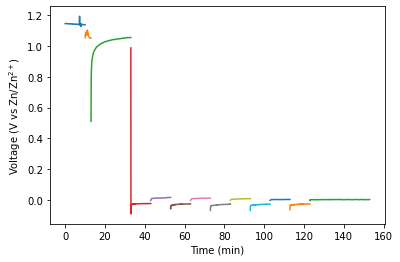

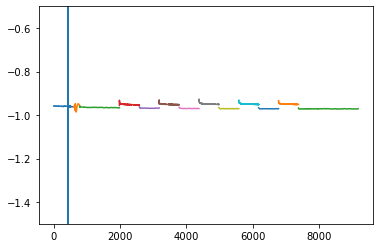

In [202]:
bv_currents = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220728_Zn_3electrode_dischargeCPsteps_Ar/220728_Zn_3electrode_dischargeCPsteps_Ar_Ch1__2022-07-28_12.25_34.txt')
bv_current_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220728_Zn_3electrode_dischargeCPsteps_Ar/')


#working electrode current step plot
plt.figure()
for i in range(len(bv_current_ec)):
    if  'Ewe/V' in bv_current_ec[i].columns:
        bv_current_ec[i]['Ewe/V'] += 0.98
        plt.plot(bv_current_ec[i]['time/s']/60, bv_current_ec[i]['Ewe/V'])
    else:
        bv_current_ec[i]['<Ewe>/V'] += 0.98
        plt.plot(bv_current_ec[i]['time/s']/60, bv_current_ec[i]['<Ewe>/V'])
plt.xlabel('Time (min)')
plt.ylabel('Voltage (V vs Zn/Zn$^{2+}$)')
        #plt.ylim(-1.05,-0.98)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220728_Zn_3electrode_dischargeCPsteps_Ar/220728_Zn_CPsteps_Ivst.png',  transparent = True, dpi=600, bbox_inches='tight')

        
plt.figure()
for i in range(len(bv_current_ec)):
    if  'Ece/V' in bv_current_ec[i].columns:
        plt.plot(bv_current_ec[i]['time/s'], bv_current_ec[i]['Ece/V'])
    else:
        plt.plot(bv_current_ec[i]['time/s'], bv_current_ec[i]['<Ece>/V'])
plt.ylim(-1.5,-0.5)

        

In [203]:
def folder_files_CP(eclab_folder):

    regex= "CP"
    for i in range(len(eclab_folder)):
        array = [i for i in eclab_folder if re.search(regex, eclab_folder[i])]
    
    print(array)
#     mpts = [folder_dir + f for f in files if re.search(regex, f)]
#     mpts.sort()
    for i in array:
        getnearpos(ec_files[i]['time/s'], 20 )
    return

In [204]:
directory = '/Users/kedzie/Documents/Berkeley/Research/Data/2022/220728_Zn_3electrode_dischargeCPsteps_Ar/'
folder_files_CP(directory)

TypeError: string indices must be integers

[1.05310044, -0.025660499999999864, -0.029838199999999926, -0.03327980000000008, -0.03162299999999996, -0.030310499999999907]
0.015637739999999956


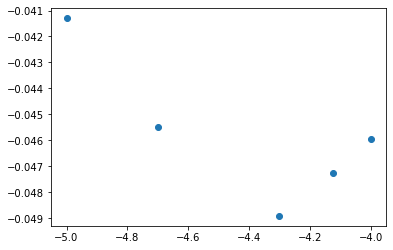

In [211]:
def extract_voltage_from_CP_steps (ec_folder):
    voltage = []
    idx = []
    for i in range(len(ec_folder)):
        if  '<Ewe>/V' in ec_folder[i].columns:
            time_start = ec_folder[i]['time/s'].iloc[0]
            time_30s = time_start+180
            idx = getnearpos(ec_folder[i]['time/s'], time_30s)
            voltage.append(ec_folder[i]['<Ewe>/V'].iloc[idx])
    print(voltage)
    return(voltage)

voltage_disch = extract_voltage_from_CP_steps(bv_current_ec)

ocv_volt_disch = bv_current_ec[4]['Ewe/V'].iloc[-1]
print(ocv_volt_disch)
del voltage_disch[0]
currents = [-10, -20, -50, -75, -100] # current steps in mA
#currents = [i for i in currents] #convert currents to uA
curr_log = [ np.log10(np.abs(i*10**-6)) for i in currents]
plt.figure()
plt.plot(curr_log, voltage_disch - ocv_volt_disch, 'o' )


[0.9178092959999999, -0.028552000000000133, 0.0029291299999999465, 0.004432360000000024, 0.007646009999999981, 0.010360759999999969, 0.013398750000000015]
[0.9178092959999999, -0.028552000000000133, 0.0029291299999999465, 0.004432360000000024, 0.007646009999999981, 0.010360759999999969, 0.013398750000000015]
0.0020010299999999592


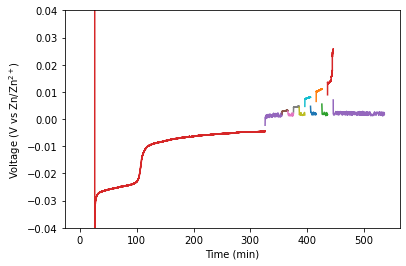

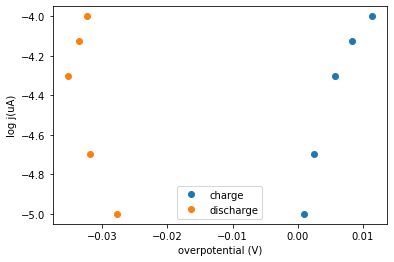

In [215]:

charge_cp_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220729_Zn_3electrode_1M_chargeCPsteps_Ar/')
plt.figure()
for i in range(len(charge_cp_ec)):
    if  'Ewe/V' in charge_cp_ec[i].columns:
        charge_cp_ec[i]['Ewe/V'] += 0.98
        plt.plot(charge_cp_ec[i]['time/s']/60, charge_cp_ec[i]['Ewe/V'])
    else:
        charge_cp_ec[i]['<Ewe>/V'] += 0.98
        plt.plot(charge_cp_ec[i]['time/s']/60, charge_cp_ec[i]['<Ewe>/V'])
plt.xlabel('Time (min)')
plt.ylabel('Voltage (V vs Zn/Zn$^{2+}$)')
plt.ylim(-0.04,0.04)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220729_Zn_3electrode_1M_chargeCPsteps_Ar/220729_Zn_CPsteps_I_vs_t_charge.png',  transparent = True, dpi=600, bbox_inches='tight')



voltage_charge = extract_voltage_from_CP_steps(charge_cp_ec)
print(voltage_charge)
del voltage_charge[0:2]
ocv_volt_chrg = charge_cp_ec[4]['Ewe/V'].iloc[-1]
print(ocv_volt_chrg)

plt.figure()
plt.plot(voltage_charge-ocv_volt_chrg, curr_log, 'o', label='charge' ) # - ocv_volt_chrg
plt.plot(voltage_disch-ocv_volt_chrg, curr_log, 'o', label='discharge' ) #- ocv_volt_disch
plt.xlabel("overpotential (V)")
plt.ylabel('log j(uA)')
plt.legend()
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220729_Zn_3electrode_1M_chargeCPsteps_Ar/220729_Zn_Ar_Tafel.png',  transparent = True, dpi=600, bbox_inches='tight')




(-1.1, -0.94)

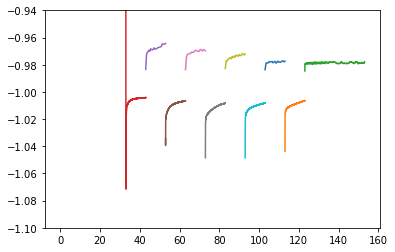

In [168]:
plt.figure()
for i in range(len(bv_current_ec)):
    if  'Ewe/V' in bv_current_ec[i].columns:
        plt.plot(bv_current_ec[i]['time/s']/60, bv_current_ec[i]['Ewe/V'], '-')
    else:
        plt.plot(bv_current_ec[i]['time/s']/60, bv_current_ec[i]['<Ewe>/V'], '-')
        
plt.ylim(-1.1, -0.94)
# plt.xlim(200,600)

[-1.0807601, 0.43947902, -0.35885891, -0.59790182, -1.0791178, -1.0236448, -1.0699123, -1.0771556, -1.0817801999999999]


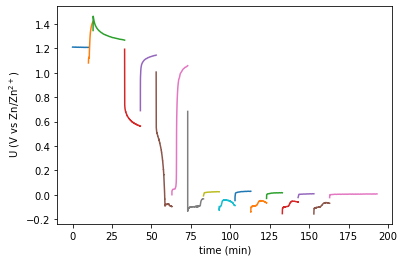

In [217]:
#Zn 3 electrode cell WITH O2 gas
discharge_pressure= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220815_Zn_3electrode_1M_dischargeCPsteps_O2/220815_Zn_3electrode_1M_dischargeCPsteps_O2_p_Ch1__2022-08-15_11.48_19.txt')
zn_discharge_o2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220815_Zn_3electrode_1M_dischargeCPsteps_O2/')
voltage_discharge_o2 = extract_voltage_from_CP_steps(zn_discharge_o2)

plt.figure()
for i in range(1, len(zn_discharge_o2)):
    if  'Ewe/V' in zn_discharge_o2[i].columns:
        zn_discharge_o2[i]['Ewe/V']+=0.98
        plt.plot(zn_discharge_o2[i]['time/s']/60, zn_discharge_o2[i]['Ewe/V'], '-')
    else:
        zn_discharge_o2[i]['<Ewe>/V']+=0.98
        plt.plot(zn_discharge_o2[i]['time/s']/60, zn_discharge_o2[i]['<Ewe>/V'], '-')
plt.xlabel('time (min)')
plt.ylabel(' U (V vs Zn/Zn$^{2+}$)')

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220815_Zn_3electrode_1M_dischargeCPsteps_O2/220815_Zn_O2_I_vs_t.png',  transparent = True, dpi=600, bbox_inches='tight')





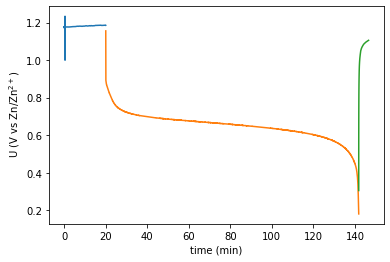

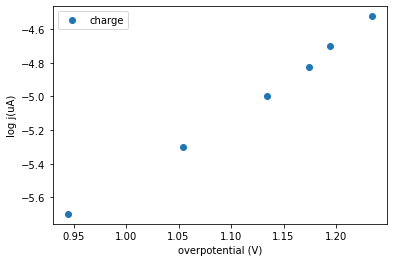

In [234]:
long_discharge_o2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220816_Zn_3electrode_discharge5uA_O2/')

for i in range( len(long_discharge_o2)):
    if  'Ewe/V' in long_discharge_o2[i].columns:
        long_discharge_o2[i]['Ewe/V']+=0.98
        plt.plot(long_discharge_o2[i]['time/s']/60, long_discharge_o2[i]['Ewe/V'], '-')
    else:
        long_discharge_o2[i]['<Ewe>/V']+=0.98
        plt.plot(long_discharge_o2[i]['time/s']/60, long_discharge_o2[i]['<Ewe>/V'], '-')
plt.xlabel('time (min)')
plt.ylabel(' U (V vs Zn/Zn$^{2+}$)')

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220816_Zn_3electrode_discharge5uA_O2/220816_Zn_5uAdischarge_I_vs_t.png',  transparent = True, dpi=600, bbox_inches='tight')


subsequent_charge = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220816_Zn_3electrode_discharge5uA_O2/220816_Zn_3electrode_chargeCPsteps/')
currents = [2,5,10, 15, 20, 30]
currents_log = [ np.log10(np.abs(i*10**-6)) for i in currents]


voltage_chg_o2_rpt= [1.07, 1.18, 1.26, 1.30, 1.32, 1.36]
voltage_chg_o2_rpt = [i + 0.98 for i in voltage_chg_o2_rpt]


#del voltage_charge[0:2]
ocv_volt_chrg = long_discharge_o2[2]['Ewe/V'].iloc[-1]


plt.figure()
plt.plot(voltage_chg_o2_rpt-ocv_volt_chrg, currents_log, 'o', label='charge' ) # - ocv_volt_chrg
#plt.plot(voltage_disch-ocv_volt_chrg, curr_log, 'o', label='discharge' ) #- ocv_volt_disch
plt.xlabel("overpotential (V)")
plt.ylabel('log j(uA)')
plt.legend()

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220816_Zn_3electrode_discharge5uA_O2/220816_charge_O2_Tafel.png',  transparent = True, dpi=600, bbox_inches='tight')


